In [480]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

In [744]:
def file_reader(fname_in,repeat,extra=""):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d" % (i_rep) + extra + ".npz"

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0
    
def file_reader_large_sample(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = np.zeros(len(p_list))
            if i_rep<100:
                succ_prob_avg += succ_prob*Nrep
                Ntot += Nrep
            else:
                succ_prob_avg[11:15] += succ_prob[11:15]*Nrep
                Ntot[11:15] += Nrep
                
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

## 7-qubit

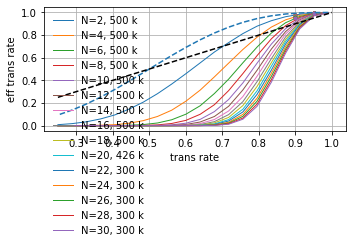

In [728]:
repeat = 500
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,31,2)
p_r = 0.05
plt.figure(1,figsize=(5,3))

bdy = True
Nl = 2
first = True

for i_L, Nl in enumerate(Nl_list):

    f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,100) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot_even))
        
    # f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
    # succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    # succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)
    # plt.plot(1-p_list_even,succ_prob_even,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))

    # f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
    f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, p_list, Ntot = file_reader_large_sample(f2,repeat) 
    # print(Ntot)
    plt.plot((1-p_list),succ_prob_odd,"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d k" % (Nl,np.amax(Ntot)/1e3))
    # plt.plot((1-p_list),succ_prob_odd**2,".", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))

f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
plt.plot(1-p_list,f(1-p_list)**1,"--")#, color="C%d" % (i_L))

x_list = np.linspace(0.25,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(7e-1,9e-1)
# # plt.ylim(6e-1,1.01)
# plt.xlim(8e-1,9e-1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## Eff trans vs. distance

0 6


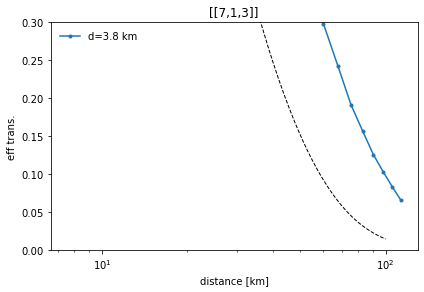

In [635]:
repeat = 100
p_r = 0.1
Nl_list = np.arange(2,31,2)
# ind_p_list = np.arange(0,15,1)#[8,11,14]
ind_p_list = np.array([6])
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    # f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    # succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)
        
    # f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
    f2 = "data_7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
    succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater
    
for i_p, ind_p in enumerate(ind_p_list):
    print(i_p,ind_p)
    unit_dist = -50*np.log10((1-p_list[ind_p])/(1-p_r))
    cost = 1/(unit_dist*succ_prob_avg[i_p,:])
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,-np.log2(1-succ_prob_avg[i_p,:]),".-",label="d=%.1f km" % (unit_dist))
        # plt.plot(Nl_list*unit_dist,cost,".-",label="d=%.1f km" % (unit_dist))


x_list = np.linspace(10,100,200)
plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
# plt.plot(x_list,10**(-0.2*x_list/10),"k--",linewidth=1)
# plt.plot(x_list,10**(-x_list/10),"k--",linewidth=1)
# plt.plot(x_list,-np.log2(1-10**(-0.01*x_list)),"k--",linewidth=1)
# plt.plot(x_list,10**(0.02*x_list),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.xscale("log")

plt.ylim(0,0.3)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,50)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[7,1,3]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

## 48-qubit ldpc

In [729]:
def file_reader_ldpc(fname_in,Nq,repeat,even_odd,extra=""):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d" % (i_rep) + extra +".npz" 

        if os.path.exists(fname):
            npz_file = np.load(fname)
            if even_odd == "odd":
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_X'], npz_file['succ_prob_X'],  npz_file['p_list'], npz_file['Nrep']
            else:
                succ_prob_word, succ_prob, p_list, Nrep = npz_file['succ_prob_word_Z'], npz_file['succ_prob_Z'],  npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_avg = np.zeros((len(p_list),Nq))
                succ_prob_word_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            succ_prob_word_avg += succ_prob_word*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, succ_prob_word_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0,0

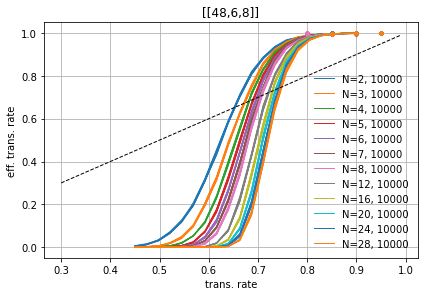

In [724]:
repeat = 200
# Nl_list = [2,10,15,20,30]#
Nl_small = np.arange(2,9)
Nl_large =  np.arange(12,30,4)
Nl_list = np.concatenate((Nl_small,Nl_large))
# Nl_list =np.arange(2,7)
p_r = 0.15

plt.figure(1,figsize=(6,4))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    f1 = "data_48q/" + "even_Nl_%d" % (Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
    plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    # print(Nl)
    f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
 
    plt.plot(1-p_list,succ_prob_odd[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
    plt.plot(1-p_list,succ_prob_odd,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
    # # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (i_L))#,label="N=%d, %d" % (Nl,Ntot))

# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list)**1,"--")#, color="C%d" % (i_L))

# f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,1)
# succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
# plt.plot(1-p_list,succ_prob_odd[:,0]**Nl,"x", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
   
x_list = np.linspace(0.3,0.99,100)
plt.plot(x_list,x_list,"k--",linewidth=1)
# plt.plot(x_list,x_list**2,"k--",linewidth=1)
# plt.fill_between(x_list,x_list**2,1+0*x_list,color="gray",alpha=0.3)
# x_list = np.linspace(0.,230,100)
# plt.plot(x_list,10**(-0.02*x_list),"k--",linewidth=1)
# plt.xlabel("distance [km]")
plt.xlabel("trans. rate")
# plt.ylabel(r"$p_{loss}$")
plt.ylabel("eff. trans. rate")
# plt.yscale("log")

# plt.ylim(1e-4,2e0)
# # # plt.ylim(6e-1,1.01)
# plt.xlim(0.0,250)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_48q.pdf")
plt.show()

distance

/tmp/ipykernel_18192/3898125930.py:28: RuntimeWarning: divide by zero encountered in true_divide
  cost = 1/(unit_dist*succ_prob_avg[i_p,:])


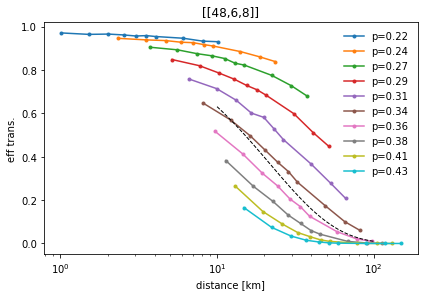

In [657]:
repeat = 200
p_r = 0.2
Nl_small = np.arange(2,9)
Nl_large =  np.arange(12,21,4)
Nl_list = np.concatenate((Nl_small,Nl_large))
# Nl_list = np.arange(2,9,1)
ind_p_list = np.arange(0,15,1)#[8,11,14]
# ind_p_list = [8]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    # print(Nl)
    f1 = "data_48q/" + "even_Nl_%d" % (Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
    # succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
    # plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
    succ_prob_avg[:,i_L] = (np.mean(succ_prob_odd,axis=1))[ind_p_list]#*np.mean(succ_prob_repeater,axis=1)
    # succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)

    
for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10((1-p_list[ind_p])/(1-p_r))
    cost = 1/(unit_dist*succ_prob_avg[i_p,:])
    if unit_dist>0:
        # plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="d=%.1f km" % (unit_dist))
        plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="p=%.2f" % (p_list[ind_p]))
        # plt.plot(Nl_list*unit_dist,cost,".-",label="d=%.1f km" % (unit_dist))

x_list = np.linspace(10,100,100)
# plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,10**(-0.2*x_list/10),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.xscale("log")

# plt.ylim(0,4e0)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,50)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

In [654]:
unit_dist = -50*np.log10((1-p_list[0])/(1-p_r))
print(unit_dist)

-2.5576261223690646


## Toric code

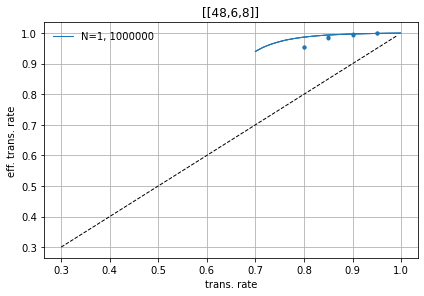

In [497]:
L = 6 # toric code dimension
repeat = 100
# Nl_list = [2,10,15,20,30]#
Nl_list =np.arange(1,2,1)
p_r = 0.1

plt.figure(1,figsize=(6,4))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    f1 = "data_toric/" + "even_L_%d_Nl_%d" % (L,Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,2,repeat,"even") 
    plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
 
    plt.plot(1-p_list,succ_prob_odd[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
    plt.plot(1-p_list,succ_prob_odd,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
    # # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (i_L))#,label="N=%d, %d" % (Nl,Ntot))

# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list)**1,"--")#, color="C%d" % (i_L))

x_list = np.linspace(0.3,0.99,100)
plt.plot(x_list,x_list,"k--",linewidth=1)
# plt.plot(x_list,x_list**2,"k--",linewidth=1)
# plt.fill_between(x_list,x_list**2,1+0*x_list,color="gray",alpha=0.3)
# x_list = np.linspace(0.,230,100)
# plt.plot(x_list,10**(-0.02*x_list),"k--",linewidth=1)
# plt.xlabel("distance [km]")
plt.xlabel("trans. rate")
# plt.ylabel(r"$p_{loss}$")
plt.ylabel("eff. trans. rate")
# plt.yscale("log")

# plt.ylim(1e-4,2e0)
# # # plt.ylim(6e-1,1.01)
# plt.xlim(0.0,250)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_48q.pdf")
plt.show()

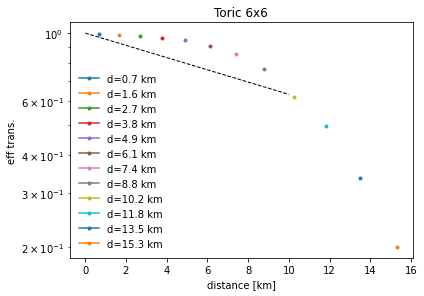

In [352]:
repeat = 100
p_r = 0.1
Nl_list = np.arange(1,2,2)
ind_p_list = np.arange(0,15,1)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    f1 = "data_toric/" + "even_L_%d_Nl_%d" % (L,Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,2,repeat,"even") 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
        
    f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
    succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)

for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10((1-p_list[ind_p])/(1-p_r))
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="d=%.1f km" % (unit_dist))

x_list = np.linspace(0.01,10,100)
# plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,10**(-0.2*x_list/10),"k--",linewidth=1)
# plt.plot(x_list,10**(-x_list/10),"k--",linewidth=1)
# plt.plot(x_list,-np.log2(1-10**(-0.01*x_list)),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.yscale("log")

# plt.ylim(1e-1,2e0)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,50)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("Toric 6x6")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

### No repeater performance as a function of loss

[[0.982393]] 1000.0 k
[[0.99963  0.999668 0.999274 0.999493 0.999464 0.999527]] 1000.0 k
[[0.9974 0.9949]] 10000


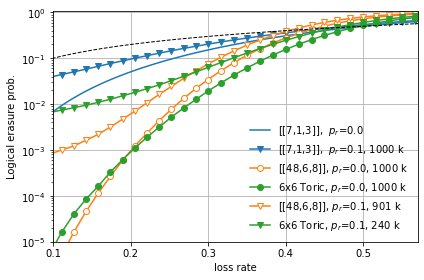

In [788]:
Nl = 1

plt.figure(1,figsize=(6,4))
f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
x_list = np.linspace(0.,0.6,100)
plt.plot(x_list,1-f(1-x_list)**1,color="C0",label="[[7,1,3]],  $p_r$=0.0")

repeat = 100
p_r= 0.1
f1 = "data_fig2/7q/" + "even_Nl_%d" % (Nl)
succ_prob_even, p_list_even, Ntot_even = file_reader(f1,100) 
succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
print(succ_prob_repeater,Ntot_even/1e3, "k")

f2 = "data_fig2/7q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
succ_prob_odd_1, p_list_1, Ntot = file_reader(f2,repeat) 
succ_prob_odd_2, p_list_2, Ntot = file_reader(f2,repeat,"_2") 
succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
p_list = np.concatenate((p_list_1,p_list_2))
succ_prob_avg = succ_prob_odd*succ_prob_repeater
plt.plot(p_list,1-succ_prob_avg.T,"v-",color="C0",label="[[7,1,3]],  $p_r$=%.1f, %d k" % (p_r,Ntot/1e3))


repeat = 300
p_r_list = [0,0.1]

marker_list = ["o","v"]
for i_p,p_r in enumerate(p_r_list):
    
    f2 = "data_fig2/48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd_1, _, p_list_1, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
    succ_prob_odd_2, _, p_list_2, Ntot = file_reader_ldpc(f2,6,repeat,"odd","_2") 
    succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
    p_list = np.concatenate((p_list_1,p_list_2))
    if p_r >0:
        f1 = "data_fig2/48q/" + "even_Nl_%d" % (Nl)
        succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
        print(succ_prob_repeater,Ntot_even/1e3, "k")
        succ_prob_avg = np.mean( succ_prob_odd*succ_prob_repeater ,axis=1)    
    else:
        succ_prob_avg = np.mean( succ_prob_odd ,axis=1)    

    plt.plot(p_list,1-succ_prob_avg.T, marker=marker_list[i_p],markerfacecolor='white', color="C1",label=r"[[48,6,8]], $p_r$=%.1f, %d k" % (p_r,Ntot/1e3))
    # plt.plot(p_list,1-np.mean( succ_prob_odd ,axis=1), marker=marker_list[i_p],markerfacecolor='white', color="C1",label=r"[[48,6,8]], $p_r$=%.1f, %d k" % (p_r,Ntot/1e3))


    f2 = "data_toric/" +  "odd_L_%d_p_%.2f_Nl_%d" % (L,p_r,Nl)
    succ_prob_odd_1, _, p_list_1, Ntot = file_reader_ldpc(f2,2,repeat,"odd") 
    succ_prob_odd_2, _, p_list_2, Ntot = file_reader_ldpc(f2,2,repeat,"odd","_2") 
    succ_prob_odd = np.concatenate((succ_prob_odd_1,succ_prob_odd_2))
    p_list = np.concatenate((p_list_1,p_list_2))
    if p_r >0:
        f1 = "data_toric/" + "even_L_%d_Nl_%d" % (L,Nl)
        succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,2,repeat,"even") 
        succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
        print(succ_prob_repeater,Ntot_even)
        succ_prob_avg = np.mean( succ_prob_odd*succ_prob_repeater ,axis=1)    
    else:
        succ_prob_avg = np.mean( succ_prob_odd ,axis=1)
        
    plt.plot(p_list,1-succ_prob_avg.T, marker=marker_list[i_p], color="C2",label=r"6x6 Toric, $p_r$=%.1f, %d k" % (p_r,Ntot/1e3))

    
x_list = np.linspace(0.,0.6,1000)
plt.plot(x_list,x_list,"k--",linewidth=1)
# plt.plot(x_list,x_list**2,"k--",linewidth=1)
# plt.fill_between(x_list,x_list**2,1+0*x_list,color="gray",alpha=0.3)
# x_list = np.linspace(0.,230,100)
# plt.plot(x_list,10**(-0.02*x_list),"k--",linewidth=1)
# plt.xlabel("distance [km]")
plt.xlabel("loss rate")
# plt.ylabel(r"$p_{loss}$")
plt.ylabel("Logical erasure prob.")
plt.yscale("log")

plt.ylim(1e-5,1.1e0)
# # # plt.ylim(6e-1,1.01)
plt.xlim(0.1,0.57)
# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_48q.pdf")
plt.show()

## PLOB bound

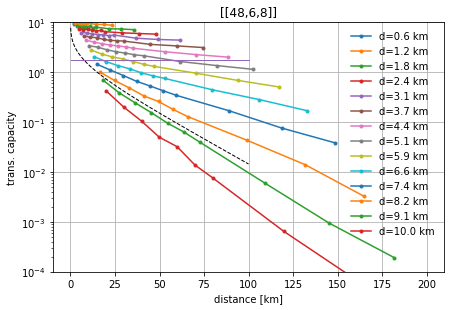

In [594]:
repeat = 200
p_r = 0.1
Nl_small = np.arange(2,9)
Nl_large =  np.arange(12,21,4)
Nl_list = np.concatenate((Nl_small,Nl_large))
# Nl_list = np.arange(2,9,1)
ind_p_list = np.arange(0,15,1)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    # print(Nl)
    f1 = "data_48q/" + "even_Nl_%d" % (Nl)
    succ_prob_even,_, p_list_even, Ntot_even = file_reader_ldpc(f1,6,repeat,"even") 
    # succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)[0,:],:]
    # plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    f2 = "data_48q/" + "odd_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, _, p_list, Ntot = file_reader_ldpc(f2,6,repeat,"odd") 
    succ_prob_avg[:,i_L] = (np.mean(succ_prob_odd,axis=1))[ind_p_list]#*np.mean(succ_prob_repeater,axis=1)
    # succ_prob_avg[:,i_L] = np.mean( succ_prob_odd[ind_p_list,:]*succ_prob_repeater ,axis=1)

    
for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10((1-p_list[ind_p])/(1-p_r))
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,-np.log2(1-succ_prob_avg[i_p,:]),".-",label="d=%.1f km" % (unit_dist))

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")


x_list = np.logspace(-1,2,100)

p_eff = 0.7
plt.plot(x_list,-np.log2(1-p_eff)+0*x_list,linewidth=1)

# plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,-np.log2(1-10**(-0.2*x_list/10)),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
# plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-4,10)
plt.ylabel("trans. capacity")
plt.grid()
plt.show()
